Upload, read and displaying an image

Saving dog.jpg to dog (6).jpg


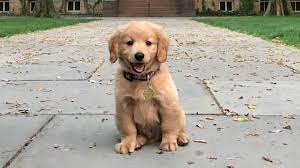

In [ ]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#Uploading an image
uploaded = files.upload()

#Get the uploaded image file name
uploaded_image= list(uploaded.keys())[0]

#Read the uploaded image
image=cv2.imread(uploaded_image)

#To check if image is loaded successfully
if image is not None:
  #Display the image
  cv2_imshow(image)
else:
  print('Failed to load the image')







Image manipulation

Saving ai.jpg to ai.jpg


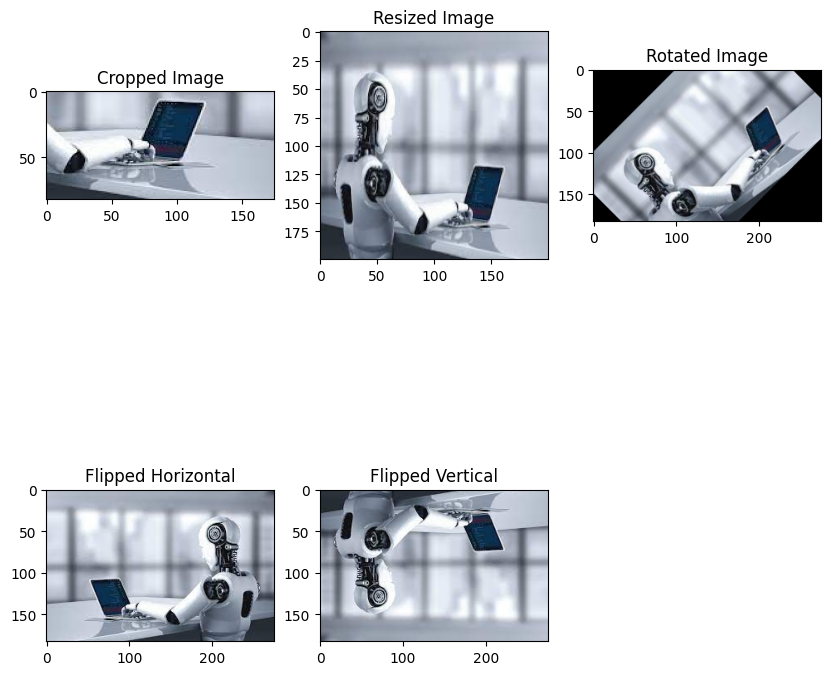

In [ ]:
import cv2
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image using OpenCV
image = cv2.imread(image_path)

# Step 3: Crop the image
x1, y1, x2, y2 = 100, 100, 300, 300  # Define the cropping region
cropped_image = image[y1:y2, x1:x2]

# Step 4: Resize the image
new_size = (200, 200)
resized_image = cv2.resize(image, new_size)

# Step 5: Rotate the image
angle = 45
(rows, cols) = image.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

# Step 6: Flip the image
flipped_image_horizontal = cv2.flip(image, 1)
flipped_image_vertical = cv2.flip(image, 0)

# Step 7: Display the modified images using Matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(flipped_image_horizontal, cv2.COLOR_BGR2RGB))
plt.title("Flipped Horizontal")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(flipped_image_vertical, cv2.COLOR_BGR2RGB))
plt.title("Flipped Vertical")

plt.show()

Adjusting brightness, contrast and saturation color

Saving tiger.jpg to tiger.jpg


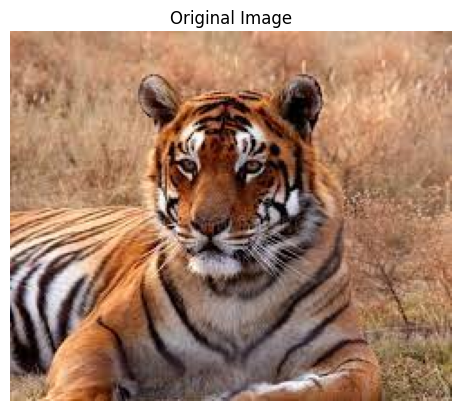

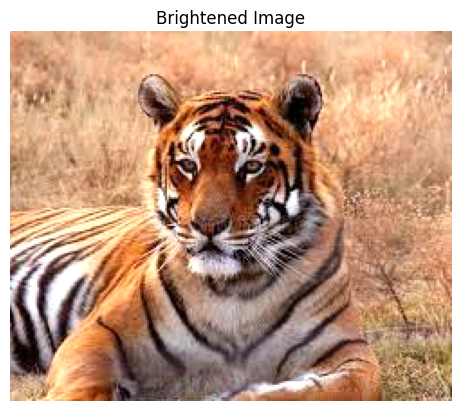

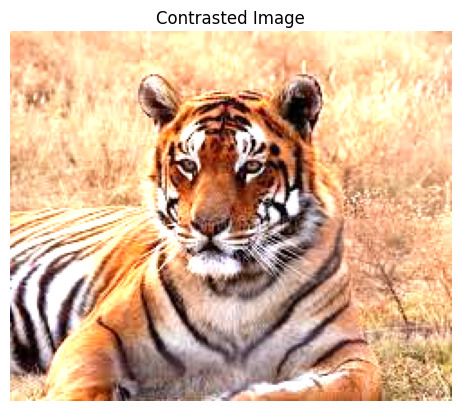

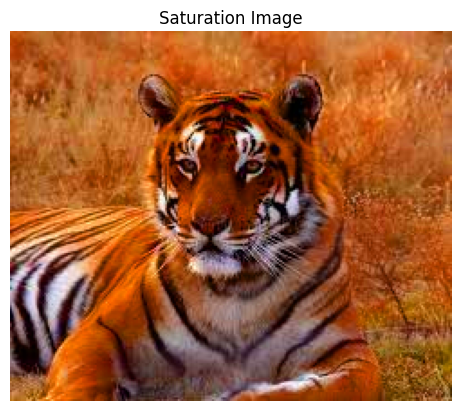

In [ ]:
import cv2
import numpy as np
from google.colab import files

# Function to display images using Matplotlib
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image using OpenCV
image = cv2.imread(image_path)

# Step 3: Adjust brightness
brightness_factor = 1.2  # Adjust this value to control brightness (1.0 is the original brightness)
brightened_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

# Step 4: Adjust contrast
contrast_factor = 1.5  # Adjust this value to control contrast (1.0 is the original contrast)
contrasted_image = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=0)

# Step 5: Adjust saturation
saturation_factor = 2.0  # Adjust this value to control saturation (1.0 is the original saturation)
saturation_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
saturation_image[:, :, 1] = np.clip(saturation_image[:, :, 1] * saturation_factor, 0, 255)
saturation_image = cv2.cvtColor(saturation_image, cv2.COLOR_HSV2BGR)

# Step 6: Display the modified images
display_image(image, title="Original Image")
display_image(brightened_image, title="Brightened Image")
display_image(contrasted_image, title="Contrasted Image")
display_image(saturation_image, title="Saturation Image")

Appling filters: Blurring, sharpning and edge detection

Saving horse.jpg to horse.jpg


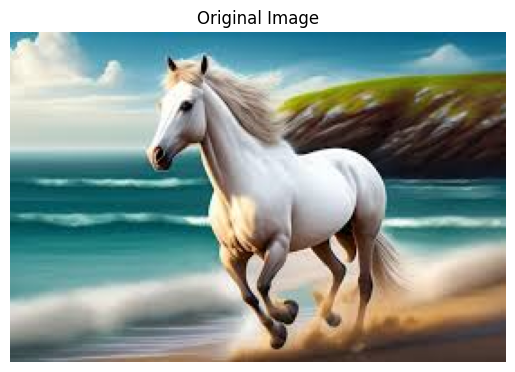

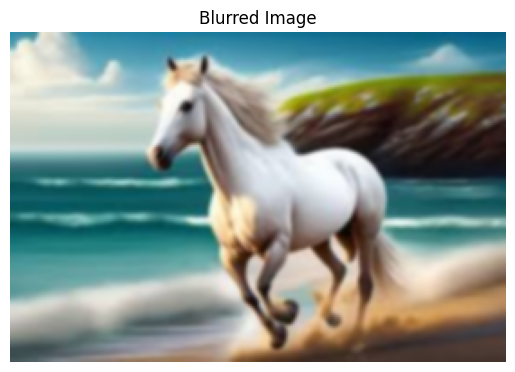

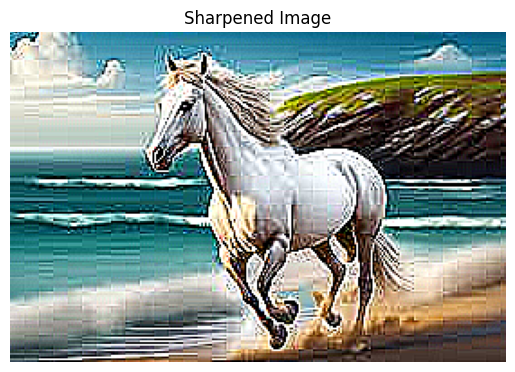

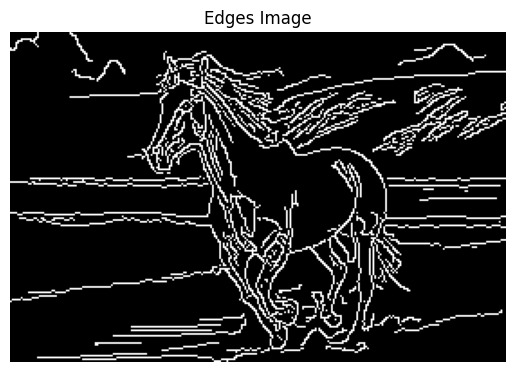

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Function to display images using Matplotlib
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image using OpenCV
image = cv2.imread(image_path)

# Step 3: Apply filters
# Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Sharpening using kernel
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(image, -1, kernel)

# Edge detection using Canny edge detection
edges_image = cv2.Canny(image, threshold1=100, threshold2=200)

# Step 4: Display the filtered images
display_image(image, title="Original Image")
display_image(blurred_image, title="Blurred Image")
display_image(sharpened_image, title="Sharpened Image")
display_image(edges_image, title="Edges Image")

Changing colour spaces: RGB to grayscale and RGB to HSV

Saving bird.jpg to bird.jpg


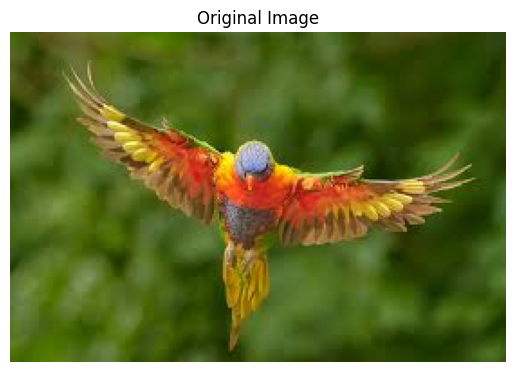

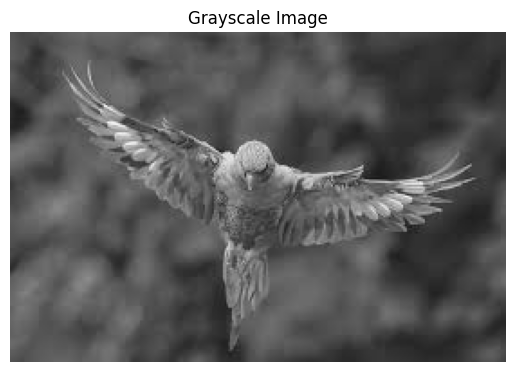

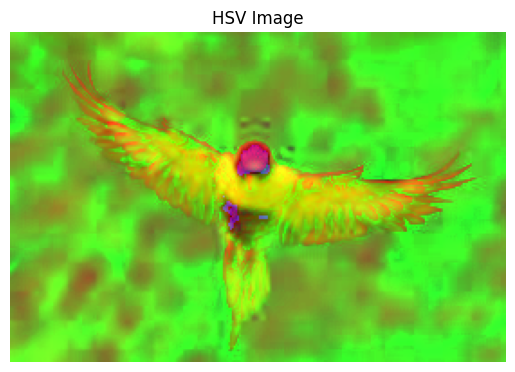

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Function to display images using Matplotlib
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image using OpenCV
image = cv2.imread(image_path)

# Step 3: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 4: Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 5: Display the original, grayscale, and HSV images
display_image(image, title="Original Image")
display_image(gray_image, title="Grayscale Image")
display_image(hsv_image, title="HSV Image")

Histogram equalization for contrast enhancement

Saving bird.jpg to bird.jpg


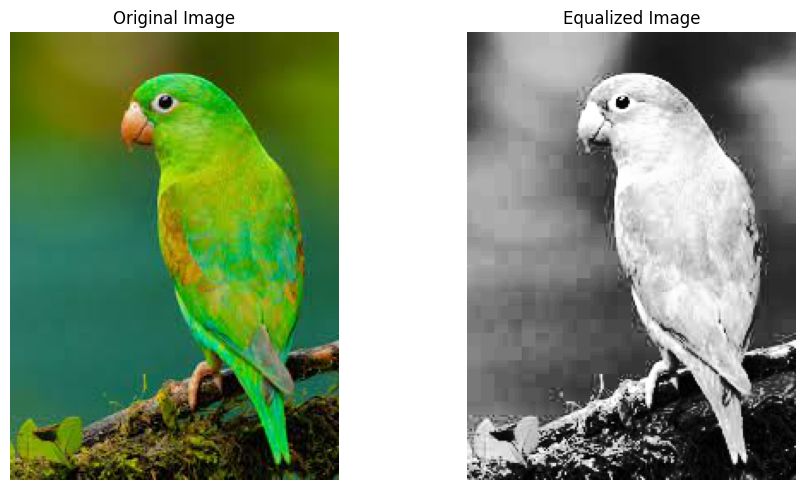

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def histogram_equalization(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform histogram equalization
    equalized_image = cv2.equalizeHist(image)

    return equalized_image

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image using OpenCV
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Unable to load the image at {image_path}. Please check the file path.")
else:
    # Perform histogram equalization
    equalized_image = histogram_equalization(image)

    # Plot the original and equalized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Denoising technique(Median filtering):

Saving bird.jpg to bird (1).jpg


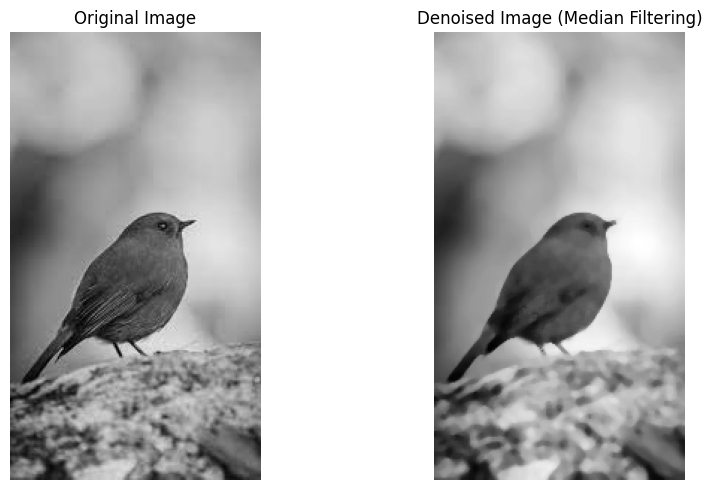

In [4]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image using OpenCV
image = cv2.imread(image_path)
# Convert the image to grayscale if it's a color image
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median filtering
denoised_image = cv2.medianBlur(image, 5)  # Adjust the kernel size (5 in this case) for different levels of denoising

# Plot the original and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Median Filtering)')
plt.axis('off')

plt.tight_layout()
plt.show()

Denoising technique(Bilateral filtering):

Saving lion.jpg to lion.jpg


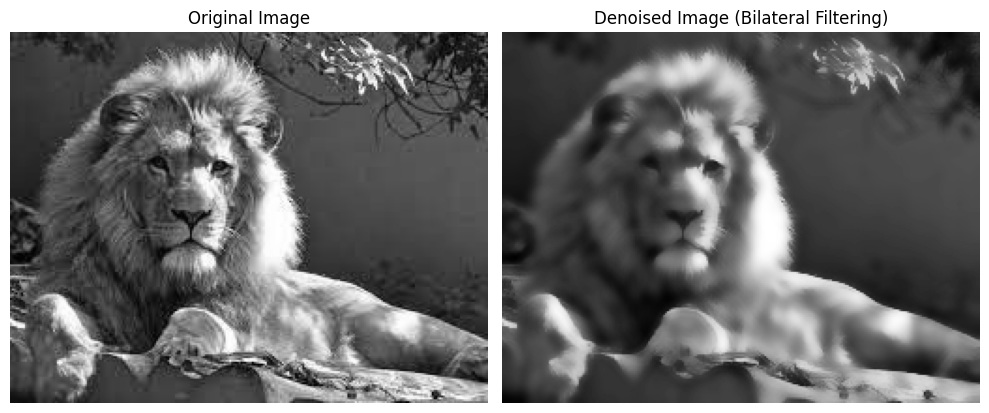

In [5]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image using OpenCV
image = cv2.imread(image_path)
# Convert the image to grayscale if it's a color image
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filtering
denoised_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Plot the original and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Bilateral Filtering)')
plt.axis('off')

plt.tight_layout()
plt.show()